# Материалы:
### - ссылка на презентацию 

https://docs.google.com/presentation/d/1sHqnv8-il5tmcUZ1OIJjQSwsWqWJE527gKDHZOsCsbw/edit?usp=sharing

### Содержание:<br>

Шаг 1. Предобработка данных<br>
Шаг 2. Исследовательский анализ данных<br>
Шаг 3. Проведение анализа пользовательского поведения, разделение пользователей на сегменты <br>
Шаг 4. Проверка гипотез <br>
Шаг 5. Общие выводы по проекту<br>
Шаг 6. Дополнительные материалы (презентация, дашборд)<br>

### Описание исследования:

Необходимо провести комплексный анализ пользовательского поведения на платформе мобильного приложения "Ненужные вещи", разбить всех пользователей на различные друг от друга группы по выделенным признакам. После этого необходимо подсчитать интересующие нас метрики: retention rate, время, проведенное в приложении, частоту действий пользователей и конверсию в целевое действие. На основе полученных данных нужно проверить 1 гипотезу из ТЗ, также необходимо сформулировать 2ую гипотезу и получить результаты. После проведенного анализа должны быть сформированы общие выводы по проекту, сформулированы рекомендации для заказчика. Для удобства восприятия информации необходимо построить дашборд, а также подготовить презентацию в формате PDF.

### Описание данных:

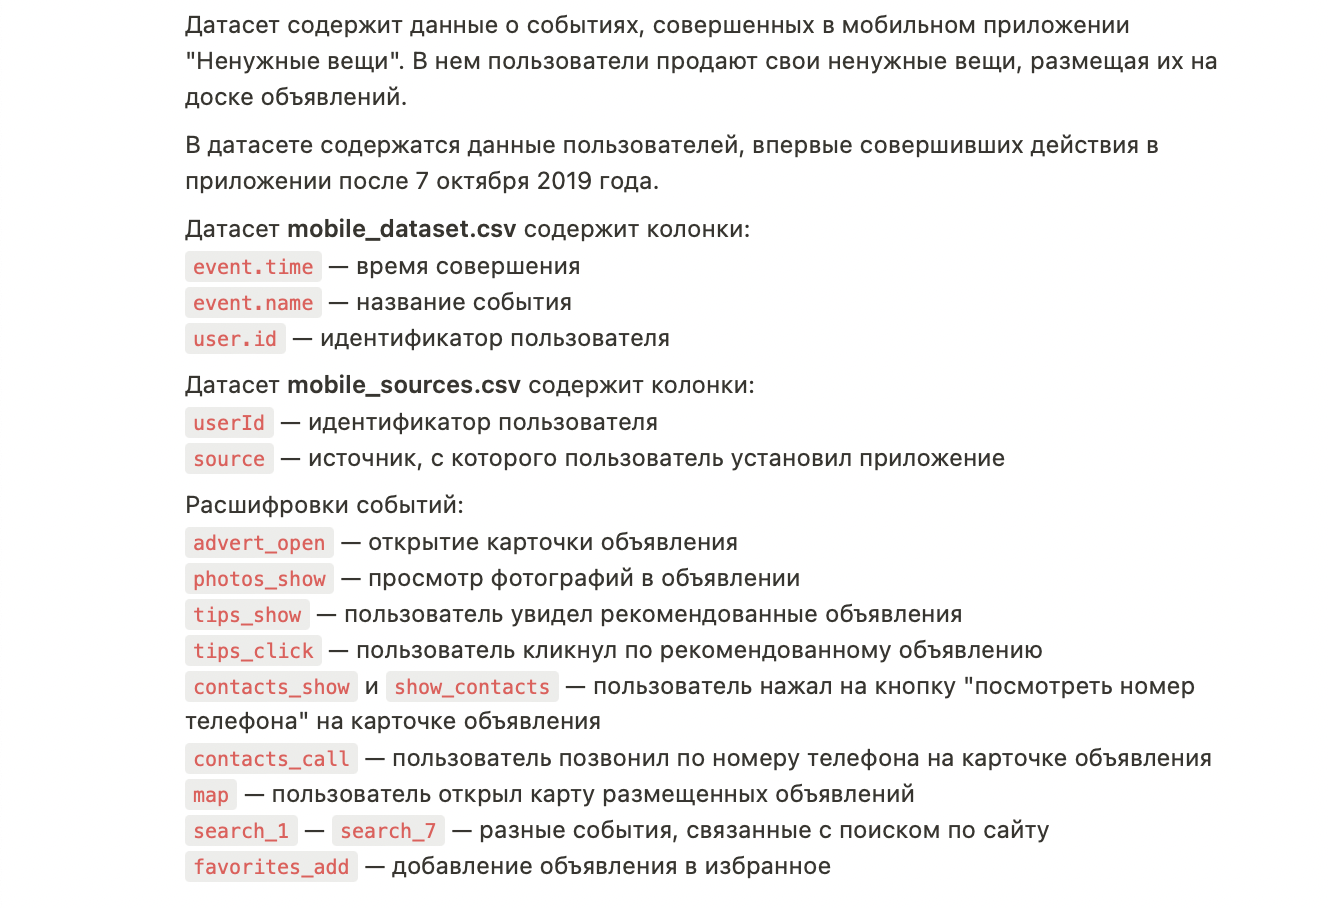

### План исследования:

Шаг 1. Предобработка данных
- импортировать необходимые библиотеки
- подгрузить датасеты “mobile_soures.csv”, “mobile_dataset.csv”
- ознакомиться с данными
- проверить данные на пропуски и дубликаты
- привести название столбцов к единому стилю
- изменить типы данных в столбцах для удобства работы
- сделать промежуточные выводы

Шаг 2. Исследовательский анализ данных

Шаг 3. Проведение анализа пользовательского поведения, разделение пользователей на сегменты 
- разделить пользователей на сегменты в зависимости от вовлеченности (для дальнейшей адаптации приложения на целевую и смежные аудитории)
- пользователи какой группы склонны часто возвращаться в мобильное приложение (retention rate)
- подсчитать время, которое пользователи из разных групп проводят в приложении
- подсчитать частоту совершения различных событий пользователями
- пользователи какой группы чаще совершают целевое событие (конверсия в целевое действие - “contacts_show”)?
- как различается время между распространенными событиями пользователей из разных групп? 

Шаг 4. Проверка гипотез <br>
<br>**4a. Гипотеза 1.** Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.
<br>**4b. Гипотеза 2.** 4в. Гипотеза 2. Конверсия в целевое действие не менялась в начале (первая неделя) и в конце (последняя неделя) периода нашего исследования.

Шаг 5. Общие выводы по проекту
- сформулировать общие выводы по проекту, интерепретировать полученные результаты, предоставить результаты проверки двух гипотез, сформировать рекомендации на основе полученных данных. 

Шаг 6. Дополнительные материалы (презентация, дашборд)
- ссылка на дашборд в Tableau
- ссылка на презентацию в формате PDF

# Шаг 1. Предобработка данных

### - импортировать необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import math

import datetime as dt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 2000)

pd.options.display.float_format = '{:,.2f}'.format

import seaborn as sns

from scipy import stats as st

from statsmodels.stats.proportion import proportions_ztest


import warnings
warnings.simplefilter('ignore')

### - подгрузить датасеты “mobile_soures.csv”, “mobile_dataset.csv”

In [2]:
try:
    mobile_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
    mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')
except:
    mobile_sourсes = pd.read_csv('mobile_soures.csv')
    mobile_dataset = pd.read_csv('mobile_dataset.csv')

### - ознакомиться с данными

In [3]:
mobile_sourсes

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
...,...,...
4288,b86fe56e-f2de-4f8a-b192-cd89a37ecd41,yandex
4289,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,yandex
4290,437a4cd4-9ba9-457f-8614-d142bc48fbeb,yandex
4291,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex


In [4]:
mobile_sourсes.shape

(4293, 2)

In [5]:
mobile_sourсes.describe()

,userId,source
count,4293,4293
unique,4293,3
top,a15407fd-36b5-4337-9f3e-5379eebece0c,yandex
freq,1,1934


In [6]:
mobile_sourсes['source'].unique()

array(['other', 'yandex', 'google'], dtype=object)

In [7]:
mobile_dataset

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9


In [8]:
mobile_dataset.shape

(74197, 3)

In [9]:
mobile_dataset.describe()

,event.time,event.name,user.id
count,74197,74197,74197
unique,74197,16,4293
top,2019-10-27 23:51:26.477481,tips_show,cb36854f-570a-41f4-baa8-36680b396370
freq,1,40055,478


In [10]:
np.sort(mobile_dataset['event.name'].unique())

array(['advert_open', 'contacts_call', 'contacts_show', 'favorites_add',
       'map', 'photos_show', 'search_1', 'search_2', 'search_3',
       'search_4', 'search_5', 'search_6', 'search_7', 'show_contacts',
       'tips_click', 'tips_show'], dtype=object)

### - проверить данные на пропуски и дубликаты

In [11]:
mobile_sourсes.isna().sum()

userId    0
source    0
dtype: int64

In [12]:
mobile_sourсes.duplicated().sum()

0

In [13]:
mobile_dataset.isna().sum()

event.time    0
event.name    0
user.id       0
dtype: int64

In [14]:
mobile_dataset.duplicated().sum()

0

### - привести название столбцов к единому стилю

In [15]:
mobile_sourсes = mobile_sourсes.rename(columns={'userId': 'user_id'})
mobile_sourсes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  4293 non-null   object
 1   source   4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [16]:
mobile_dataset = mobile_dataset.rename(columns={'event.time': 'event_time', 'event.name':'event_name','user.id':'user_id'})
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_time  74197 non-null  object
 1   event_name  74197 non-null  object
 2   user_id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


### - объединить данные для дальнейшей работы

In [17]:
data_compiled = pd.merge(mobile_sourсes, mobile_dataset, on="user_id")

In [18]:
data_compiled

,user_id,source,event_time,event_name
0,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:00.431357,advert_open
1,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:01.236320,tips_show
2,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:07.039334,tips_show
3,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:01:27.770232,advert_open
4,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:01:34.804591,tips_show
...,...,...,...,...
74192,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03 23:46:47.068179,map
74193,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03 23:46:58.914787,advert_open
74194,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03 23:47:01.232230,tips_show
74195,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03 23:47:47.475102,advert_open


### - изменить типы данных в столбцах для удобства работы

In [20]:
data_compiled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     74197 non-null  object        
 1   source      74197 non-null  object        
 2   event_time  74197 non-null  datetime64[ns]
 3   event_name  74197 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.8+ MB


In [21]:
data_compiled

,user_id,source,event_time,event_name
0,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:00,advert_open
1,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:01,tips_show
2,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:07,tips_show
3,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:01:27,advert_open
4,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:01:34,tips_show
...,...,...,...,...
74192,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03 23:46:47,map
74193,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03 23:46:58,advert_open
74194,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03 23:47:01,tips_show
74195,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03 23:47:47,advert_open


### - привести дублирующие друг друга значения ('contacts_show', 'show_contacts') в колонке "event_name" к единому названию 'show_contacts'

In [22]:
data_compiled['event_name'] = data_compiled['event_name'].str.replace('contacts_show','show_contacts')

In [23]:
data_compiled['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'tips_click', 'search_4',
       'search_2', 'search_5', 'show_contacts', 'search_6', 'photos_show',
       'search_1', 'search_3', 'favorites_add', 'contacts_call',
       'search_7'], dtype=object)

### - сделать промежуточные выводы

Во время подготовки данных были импортированы все необходимые библиотеки. После этого мы подгрузили документы 'mobile_soures.csv’, 'mobile_dataset.csv', с которым первично ознакомились. В данных таблицах мы нашли данные о поисковых платформах, с которых пользователи переходили в мобильное приложение и устанавливали его. Также, во второй таблице были данные о времени совершения различных событий (После объединения "событий-дубликатов" осталось 15 различных событий: ‘advert_open', 'contacts_call', 'favorites_add', 'map', 'photos_show', 'search_1', 'search_2', 'search_3', 'search_4', 'search_5', 'search_6', 'search_7', 'show_contacts', 'tips_click', 'tips_show’) каждым из пользователей. После этого мы выяснили, что пропущенные значения в таблице отсутствуют, также как и дубликаты. Столбцы в таблице были приведены к единому стилю. Типы данных в столбцах были изменены для удобства дальнейшей работы. После этого, мы объединили данные из двух таблиц в одну по “user_id”.

**Данные подготовлены для дальнейшей работы.**

# Шаг 2. Исследовательский анализ данных

In [24]:
data_compiled['event_time'].min()

Timestamp('2019-10-07 00:00:00')

In [25]:
data_compiled['event_time'].max()

Timestamp('2019-11-03 23:58:12')

# Шаг 3. Проведение анализа пользовательского поведения, разделение пользователей на сегменты 

### - разделить пользователей на сегменты в зависимости от вовлеченности (для дальнейшей адаптации приложения на целевую и смежные аудитории)

In [26]:
data_compiled.groupby('user_id').agg('nunique').sort_values(by='event_time', ascending=False).head(2000)

,source,event_time,event_name
user_id,,,
cb36854f-570a-41f4-baa8-36680b396370,1,469,4
e13f9f32-7ae3-4204-8d60-898db040bcfc,1,460,11
9ce63488-758a-481a-bcb5-a02b467e1d84,1,406,5
21230dd9-2f7f-4b77-a436-43d4d10388e0,1,398,5
be1449f6-ca45-4f94-93a7-ea4b079b8f0f,1,396,4
e38cb669-7335-4d56-9de5-c8d5d2f13fd3,1,353,8
abdcbe3c-221b-4f59-afd9-bf9ca78f7e4c,1,349,6
320cab3c-e823-4dff-8c01-c4253764640a,1,328,5
28fccdf4-7b9e-42f5-bc73-439a265f20e9,1,308,6


In [27]:
data_compiled_by_events = data_compiled.groupby('event_name').agg({'event_time':'count'})
data_compiled_by_events = data_compiled_by_events.sort_values(by='event_time', ascending=True)
data_compiled_by_events

,event_time
event_name,
search_7,222
search_2,324
search_6,460
search_3,522
contacts_call,541
search_4,701
tips_click,814
search_5,1049
favorites_add,1417


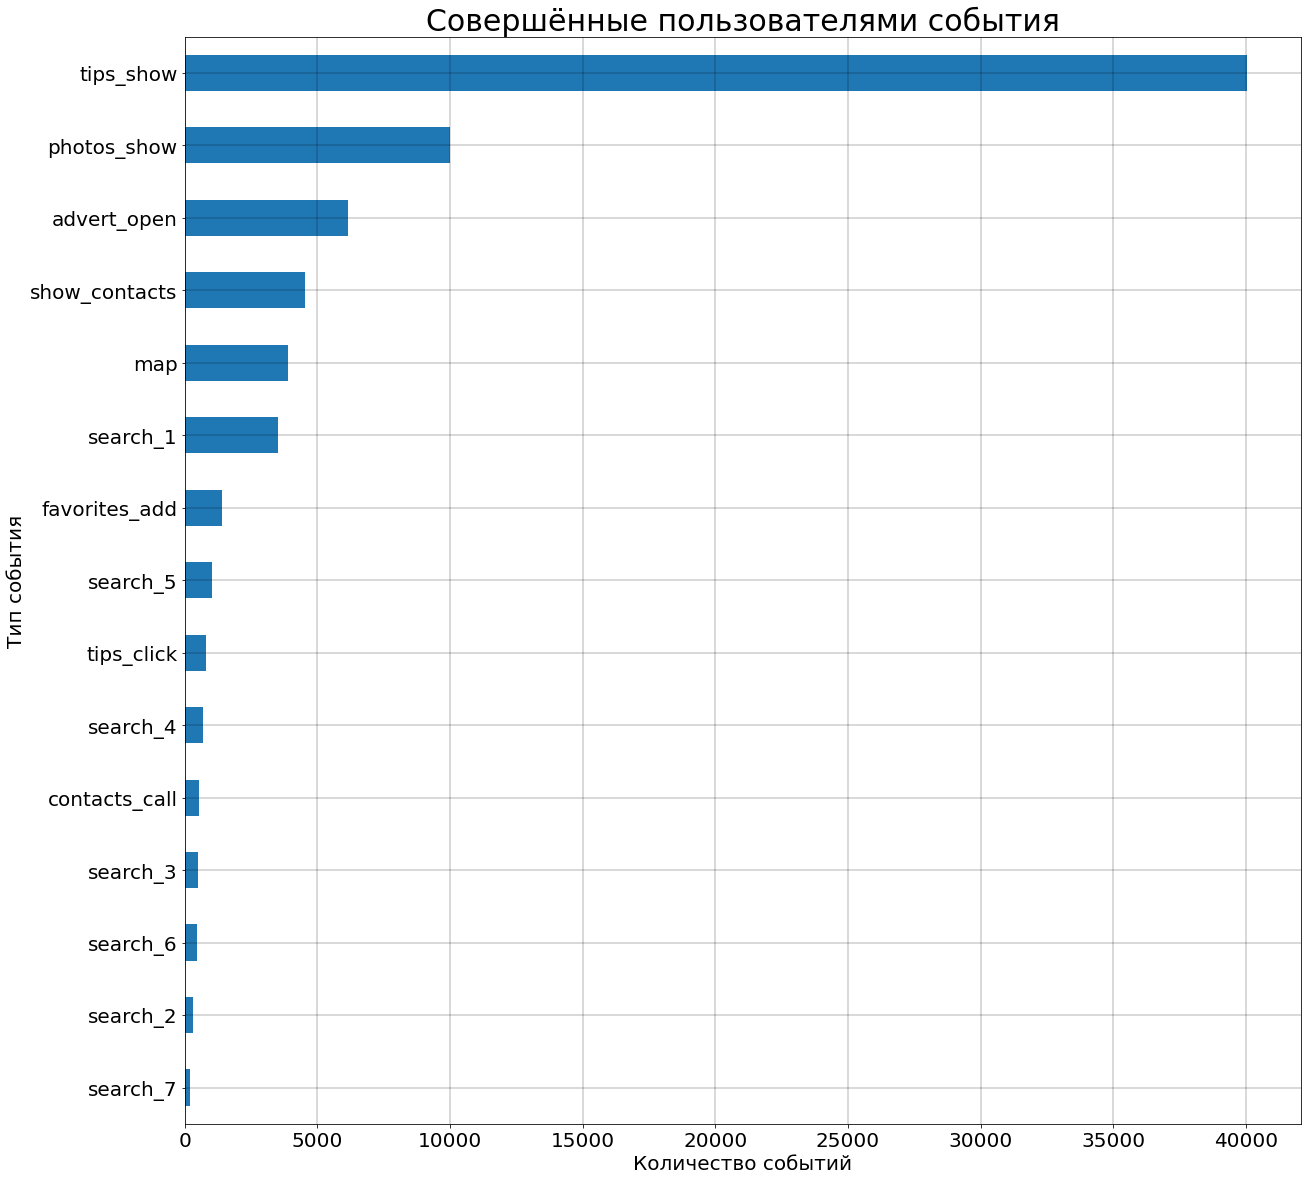

In [28]:
data_compiled_by_events.plot(kind='barh' ,figsize=(20, 20),legend=False)

plt.xlabel('Количество событий', fontsize=20)
plt.ylabel('Тип события', fontsize=20)
plt.title('Совершённые пользователями события', fontsize=30)
plt.grid(True, color='black', linestyle='-', linewidth=0.3)
plt.xticks(rotation= 0, fontsize=20)
plt.yticks(fontsize=20)

plt.show()

Из данного графика видно, что пользователям непрерывно показываются рекомендованные объявление, при этом, уровень взаимодействия с ними остаётся низким. Наиболее популярным способом поиска товаров является "search_1". Также, я заметил какой-то неприятный провал в пайплайне между действиями show_contacts и contacts_call (какой-то непорядок. С другой стороны, как сайт может отслеживать позвонили ли мы по номеру, указанному в карточке, либо нет? ). Думаю, что это наиболее удачная пара действий для дальнейшего рассмотрения во время ответа на вопрос "как различается время между распространенными событиями пользователей из разных групп?". 

In [29]:
data_compiled['week_number'] = data_compiled['event_time'].dt.isocalendar().week

Добавляю номера недель в общую таблицу

In [30]:
data_compiled.head()

,user_id,source,event_time,event_name,week_number
0,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:00,advert_open,41
1,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:01,tips_show,41
2,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:07,tips_show,41
3,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:01:27,advert_open,41
4,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:01:34,tips_show,41


In [31]:
number_of_events_per_week = (data_compiled
                .groupby(['week_number','user_id'])['event_time'].count()
                .reset_index()
                )

number_of_events_per_week

,week_number,user_id,event_time
0,41,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,13
1,41,005fbea5-2678-406f-88a6-fbe9787e2268,5
2,41,006a32d4-ee10-40dc-b237-11e0fde81cbc,6
3,41,006f6ced-225b-4f9c-9f17-23404bc6835f,5
4,41,00a93a72-3bbc-4ee7-8a81-7134f45ae009,12
...,...,...,...
5525,44,fee3ba1c-16f4-46f7-bf56-4bf80cc4e2f5,11
5526,44,fee79c65-d57e-42dc-9f3c-bfa69717eb2d,20
5527,44,ff82c7c7-16d6-44b1-833b-a217747b0b02,30
5528,44,ffe68f10-e48e-470e-be9b-eeb93128ff1a,7


In [32]:
average_number_of_events_per_user = (number_of_events_per_week
                .groupby('user_id').agg('mean'))
                
average_number_of_events_per_user

,week_number,event_time
user_id,,
0001b1d5-b74a-4cbf-aeb0-7df5947bf349,42.00,17.50
00157779-810c-4498-9e05-a1e9e3cedf93,43.00,23.67
00463033-5717-4bf1-91b4-09183923b9df,44.00,10.00
004690c3-5a84-4bb7-a8af-e0c8f8fca64e,43.00,10.67
00551e79-152e-4441-9cf7-565d7eb04090,43.50,4.00
...,...,...
ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,42.00,8.50
ffc01466-fdb1-4460-ae94-e800f52eb136,41.00,7.00
ffcf50d9-293c-4254-8243-4890b030b238,43.00,2.00


Рассчитываю 80ый перцентиль, задаю условия для разделения пользователей на группы

In [33]:
np_80 = np.percentile(average_number_of_events_per_user['event_time'], [80])
np_80

array([17.])

In [34]:
average_number_of_events_per_user.loc[average_number_of_events_per_user['event_time'] >= 17, 'status'] = 'Высокая активность'
average_number_of_events_per_user.loc[average_number_of_events_per_user['event_time'] < 17, 'status'] = 'Низкая активность'
average_number_of_events_per_user

,week_number,event_time,status
user_id,,,
0001b1d5-b74a-4cbf-aeb0-7df5947bf349,42.00,17.50,Высокая активность
00157779-810c-4498-9e05-a1e9e3cedf93,43.00,23.67,Высокая активность
00463033-5717-4bf1-91b4-09183923b9df,44.00,10.00,Низкая активность
004690c3-5a84-4bb7-a8af-e0c8f8fca64e,43.00,10.67,Низкая активность
00551e79-152e-4441-9cf7-565d7eb04090,43.50,4.00,Низкая активность
...,...,...,...
ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,42.00,8.50,Низкая активность
ffc01466-fdb1-4460-ae94-e800f52eb136,41.00,7.00,Низкая активность
ffcf50d9-293c-4254-8243-4890b030b238,43.00,2.00,Низкая активность


In [35]:
data_compiled = pd.merge(data_compiled, average_number_of_events_per_user['status'], on='user_id' , how='right')

Добавляю "Статус" в общую таблицу

In [36]:
data_compiled

,user_id,source,event_time,event_name,week_number,status
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,tips_show,41,Высокая активность
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:40:31,tips_show,41,Высокая активность
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:41:05,tips_show,41,Высокая активность
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:43:20,tips_show,41,Высокая активность
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:30,tips_show,41,Высокая активность
...,...,...,...,...,...,...
74192,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 15:51:23,tips_show,44,Высокая активность
74193,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 15:51:57,show_contacts,44,Высокая активность
74194,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 16:07:40,tips_show,44,Высокая активность
74195,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 16:08:18,tips_show,44,Высокая активность


In [37]:
categorical_columns = ['source', 'event_name']
numerical_values = ['week_number']

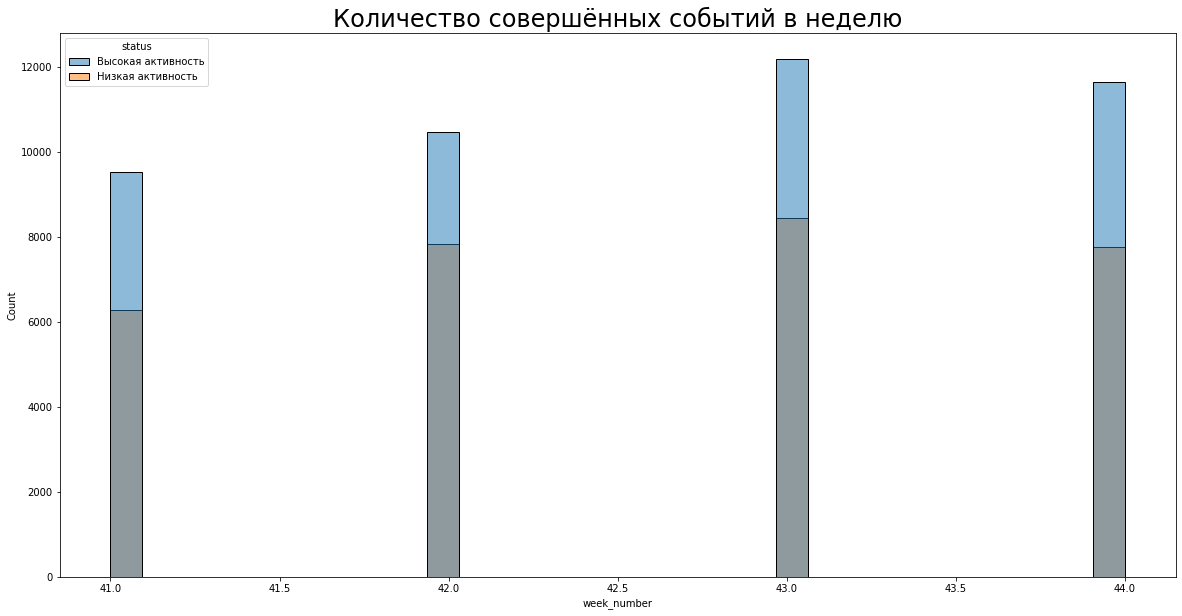

In [38]:
for col in numerical_values:
    plt.figure(figsize=(20, 10))
    data_compiled.groupby('status')[col]
    sns.histplot(x=data_compiled[col], hue='status', data=data_compiled)
    plt.title('Количество совершённых событий в неделю', fontsize=24)
    plt.show()

Из данного графика видно, что, в целом, активность пользователей в нашем приложении растет. 

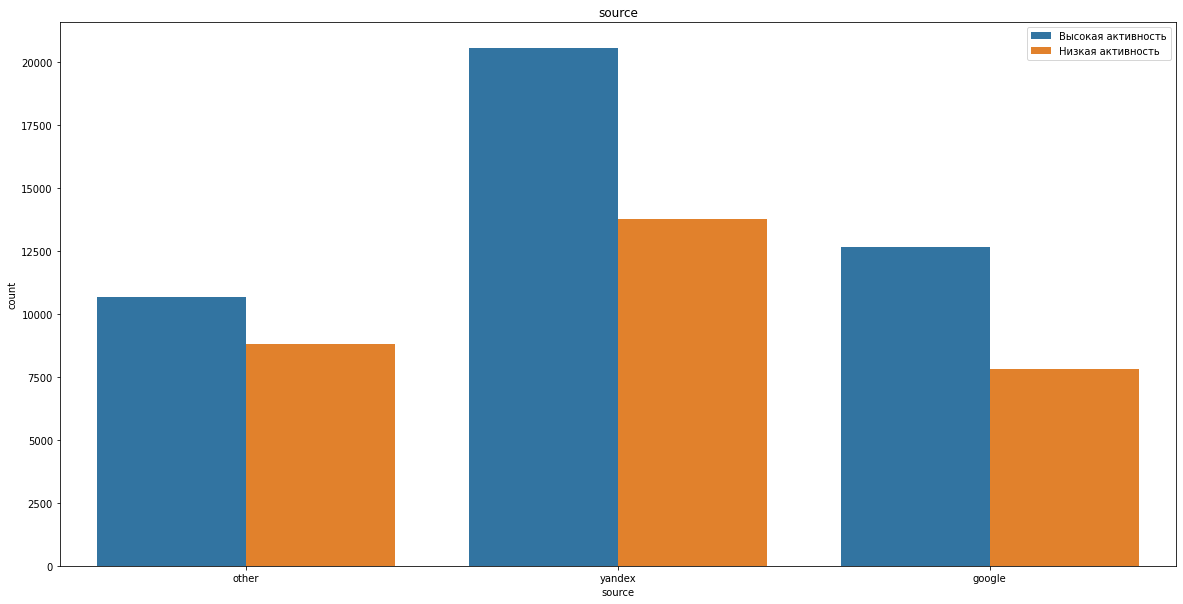

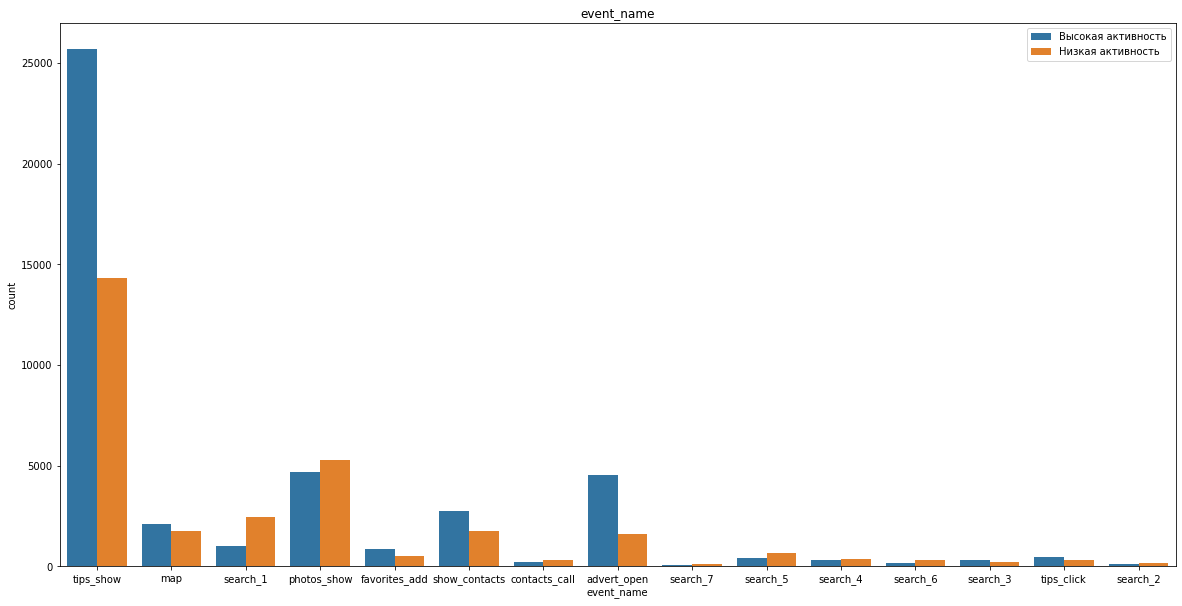

In [39]:
for col in categorical_columns:
    plt.figure(figsize=(20, 10))
    sns.countplot(x=data_compiled[col], hue='status', data=data_compiled)
    plt.title(col)
    plt.legend()
    plt.show()

Из графиков выше видно, что наибольший трафик новых пользователей привлекается из Яндекса.

Также, мы видим, что пользователи с высокой активностью открывают больше объявлений, но совершают меньше звонков по ним. Опять же, наиболее популярным способом поиска товаров является search_1, особенно среди пользователей с низкой активностью. Пользователи с "Высокой активностью" просматривают больше "рекомендованных объявлений", и за редким исключением, реагируют на них. Пользователи с низкой активностью также склонны игнорировать "рекомендации".

### - подсчитать время, которое пользователи из разных групп проводят в приложении

Разделяю активность пользователей на сессии

In [40]:
g = (data_compiled.groupby('user_id')['event_time'].diff() > pd.Timedelta('30Min')).cumsum()
data_compiled['session_id'] = data_compiled.groupby(['user_id', g], sort=False).ngroup() + 1
data_compiled.head()

,user_id,source,event_time,event_name,week_number,status,session_id
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,tips_show,41,Высокая активность,1
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:40:31,tips_show,41,Высокая активность,1
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:41:05,tips_show,41,Высокая активность,1
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:43:20,tips_show,41,Высокая активность,1
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:30,tips_show,41,Высокая активность,1


In [41]:
average_time_high = data_compiled.query('status == "Высокая активность"')
average_time_high = average_time_high.groupby(['status', 'session_id'])['event_time'].max() - average_time_high.groupby(['status', 'session_id'])['event_time'].min()
average_time_high

status              session_id
Высокая активность  1            0 days 00:09:56
                    2            0 days 00:08:27
                    3            0 days 00:15:00
                    4            0 days 00:12:38
                    5            0 days 00:25:21
                                       ...      
                    10364        0 days 00:00:00
                    10365        0 days 00:16:14
                    10366        0 days 00:04:57
                    10367        0 days 00:15:49
                    10368        0 days 00:32:24
Name: event_time, Length: 3936, dtype: timedelta64[ns]

In [42]:
average_time_low = data_compiled.query('status == "Низкая активность"')
average_time_low = average_time_low.groupby(['status', 'session_id'])['event_time'].max() - average_time_low.groupby(['status', 'session_id'])['event_time'].min()
average_time_low

status             session_id
Низкая активность  11           0 days 00:24:42
                   12           0 days 00:03:35
                   13           0 days 00:01:24
                   14           0 days 00:28:19
                   15           0 days 00:37:50
                                      ...      
                   10334        0 days 00:00:53
                   10335        0 days 00:01:20
                   10336        0 days 00:10:24
                   10337        0 days 00:12:36
                   10338        0 days 00:15:54
Name: event_time, Length: 6432, dtype: timedelta64[ns]

In [43]:
print('Средняя продолжительность сессий - Высокая активность: ', average_time_high.mean())
print('Средняя продолжительность сессий - Низкая активность: ', average_time_low.mean())

Средняя продолжительность сессий - Высокая активность:  0 days 00:19:33.468750
Средняя продолжительность сессий - Низкая активность:  0 days 00:08:47.409825870


В среднем, пользователи с Высокой активностью проводят около 19 минут в мобильном приложении за время одной сессии, в то время как пользователи с Низкой активностью проводят около 9 минут за время одной сессии.

### - подсчитать частоту совершения различных событий пользователями

In [44]:
data_compiled_frequency_high = data_compiled.query('status == "Высокая активность"')
data_compiled_frequency_high = data_compiled_frequency_high.groupby(['event_name','status'])['event_name'].count()/data_compiled_frequency_high.groupby(['event_name','status'])['event_name'].count().sum()
data_compiled_frequency_high.sort_values(ascending=False)

event_name     status            
tips_show      Высокая активность   0.59
photos_show    Высокая активность   0.11
advert_open    Высокая активность   0.10
show_contacts  Высокая активность   0.06
map            Высокая активность   0.05
search_1       Высокая активность   0.02
favorites_add  Высокая активность   0.02
tips_click     Высокая активность   0.01
search_5       Высокая активность   0.01
search_4       Высокая активность   0.01
search_3       Высокая активность   0.01
contacts_call  Высокая активность   0.00
search_6       Высокая активность   0.00
search_2       Высокая активность   0.00
search_7       Высокая активность   0.00
Name: event_name, dtype: float64

In [45]:
data_compiled_frequency_low = data_compiled.query('status == "Низкая активность"')
data_compiled_frequency_low = data_compiled_frequency_low.groupby(['event_name','status'])['event_name'].count()/data_compiled_frequency_low.groupby(['event_name','status'])['event_name'].count().sum()
data_compiled_frequency_low.sort_values(ascending=False)

event_name     status           
tips_show      Низкая активность   0.47
photos_show    Низкая активность   0.17
search_1       Низкая активность   0.08
map            Низкая активность   0.06
show_contacts  Низкая активность   0.06
advert_open    Низкая активность   0.05
search_5       Низкая активность   0.02
favorites_add  Низкая активность   0.02
search_4       Низкая активность   0.01
tips_click     Низкая активность   0.01
contacts_call  Низкая активность   0.01
search_6       Низкая активность   0.01
search_3       Низкая активность   0.01
search_2       Низкая активность   0.01
search_7       Низкая активность   0.00
Name: event_name, dtype: float64

Чаще всего пользователи с "Высокой активностью" видят "рекомендации", просматривают фото, открывают объявления,  открывают контакты, а также просматривают объявления на карте.

Пользователи с "Низкой активностью" чаще всего просматривают "рекомендованные объявления", просматривают фото, ищут товары с помощью search_1, просматривают объявления на карте, открывают объявления.

Можно заметить, что пользователи с "Низкой активностью" чаще просматривают фото, но реже открывают объявления. Также, они чаще осуществляют поиск объявлений, но реже их просматривают. Предпологаю, что пользователи с "Высокой активностью" умеет точнее формулировать свои поисковые запросы и находить то, что им нужно.

### - пользователи какой группы чаще совершают целевое событие (конверсия в целевое действие - “show_contacts”)?

In [46]:
conversion = data_compiled.query('event_name == "show_contacts"')
conversion = (conversion.groupby('status').agg({'user_id':'nunique', 'status':'count'}).rename(columns={'user_id':'performed_target_action','status':'number_of_users_in_group'}))
conversion['conversion_to_target_action'] = conversion['performed_target_action'] / conversion['number_of_users_in_group']
conversion

,performed_target_action,number_of_users_in_group,conversion_to_target_action
status,,,
Высокая активность,311,2778,0.11
Низкая активность,670,1751,0.38


### - как различается время между распространенными событиями пользователей из разных групп? 

In [47]:
two_events_high = data_compiled.query('status == "Высокая активность" and event_name == "advert_open" or event_name == "show_contacts"')
two_events_high = two_events_high.groupby(['status','session_id'])['event_time'].max() - two_events_high.groupby(['status','session_id'])['event_time'].min()
two_events_high.mean()

Timedelta('0 days 00:10:16.516775599')

In [48]:
two_events_low = data_compiled.query('status == "Низкая активность" and event_name == "advert_open" or event_name == "show_contacts"')
two_events_low = two_events_low.groupby(['status','session_id'])['event_time'].max() - two_events_low.groupby(['status','session_id'])['event_time'].min()
two_events_low.mean()

Timedelta('0 days 00:07:42.301793721')

Подтвердилось наше предположение о том, что пользователи с "Высокой активностью" тратят больше времени на просмотр объявлений, перед тем как кому-нибудь звонить с предложением о покупке товара. 

### - пользователи какой группы склонны часто возвращаться в мобильное приложение (retention rate)

In [49]:
df_new = (data_compiled.sort_values(by=['user_id', 'event_time']).groupby('user_id').agg({'event_time': 'first'}).rename(columns={'event_time': 'first_ts'}))
df_new

,first_ts
user_id,
0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45
00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33
00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35
004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:05
00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41
...,...
ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2019-10-13 16:11:27
ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07 20:32:49
ffcf50d9-293c-4254-8243-4890b030b238,2019-10-23 11:51:35


In [50]:
data_compiled = pd.merge(data_compiled, df_new['first_ts'], on='user_id' , how='right')
data_compiled.head()

,user_id,source,event_time,event_name,week_number,status,session_id,first_ts
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,tips_show,41,Высокая активность,1,2019-10-07 13:39:45
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:40:31,tips_show,41,Высокая активность,1,2019-10-07 13:39:45
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:41:05,tips_show,41,Высокая активность,1,2019-10-07 13:39:45
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:43:20,tips_show,41,Высокая активность,1,2019-10-07 13:39:45
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:30,tips_show,41,Высокая активность,1,2019-10-07 13:39:45


In [51]:
data_compiled['first_ts'] = data_compiled['first_ts'].dt.strftime("%Y-%m-%d")
data_compiled['first_ts'] = pd.to_datetime(data_compiled['first_ts'], format='%Y-%m-%d')

data_compiled['event_time'] = data_compiled['event_time'].dt.strftime("%Y-%m-%d")
data_compiled['event_time'] = pd.to_datetime(data_compiled['event_time'], format='%Y-%m-%d')

data_compiled['lifetime'] = (data_compiled['event_time'] - data_compiled['first_ts']).dt.days+1
data_compiled.head()

,user_id,source,event_time,event_name,week_number,status,session_id,first_ts,lifetime
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,tips_show,41,Высокая активность,1,2019-10-07,1
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,tips_show,41,Высокая активность,1,2019-10-07,1
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,tips_show,41,Высокая активность,1,2019-10-07,1
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,tips_show,41,Высокая активность,1,2019-10-07,1
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,tips_show,41,Высокая активность,1,2019-10-07,1


In [52]:
data_compiled['first_ts'] = data_compiled['first_ts'].dt.isocalendar().week

In [53]:
data_compiled_high = data_compiled.query('status == "Высокая активность"')

In [54]:
group = data_compiled_high.groupby(['first_ts', 'lifetime'])
cohort_data = group['user_id'].size()
cohort_data = cohort_data.reset_index()
cohort_data

,first_ts,lifetime,user_id
0,41,1,6973
1,41,2,1649
2,41,3,637
3,41,4,478
4,41,5,446
5,41,6,392
6,41,7,365
7,41,8,315
8,41,9,333
9,41,10,258


In [55]:
cohort_counts = cohort_data.pivot(index='first_ts', columns='lifetime', values='user_id')
base = cohort_counts[1]
retention = cohort_counts.divide(base, axis=0).round(3)

In [56]:
cohort_counts

lifetime,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
first_ts,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41,"6,973.00","1,649.00",637.00,478.00,446.00,392.00,365.00,315.00,333.00,258.00,338.00,467.00,209.00,440.00,362.00,281.00,227.00,230.00,270.00,205.00,68.00,248.00,220.00,133.00,187.00,159.00,43.00,91.00
42,"5,578.00","1,094.00",610.00,434.00,350.00,484.00,451.00,448.00,376.00,227.00,349.00,354.00,156.00,231.00,253.00,276.00,91.00,81.00,61.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,"5,478.00",868.00,611.00,547.00,477.00,307.00,266.00,478.00,405.00,98.00,291.00,117.00,48.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,"4,033.00",953.00,409.00,366.00,131.00,29.00,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
retention = cohort_counts.divide(base, axis=0).round(2)
retention

lifetime,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
first_ts,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41,1.00,0.24,0.09,0.07,0.06,0.06,0.05,0.05,0.05,0.04,0.05,0.07,0.03,0.06,0.05,0.04,0.03,0.03,0.04,0.03,0.01,0.04,0.03,0.02,0.03,0.02,0.01,0.01
42,1.00,0.20,0.11,0.08,0.06,0.09,0.08,0.08,0.07,0.04,0.06,0.06,0.03,0.04,0.05,0.05,0.02,0.01,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,1.00,0.16,0.11,0.10,0.09,0.06,0.05,0.09,0.07,0.02,0.05,0.02,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,1.00,0.24,0.10,0.09,0.03,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


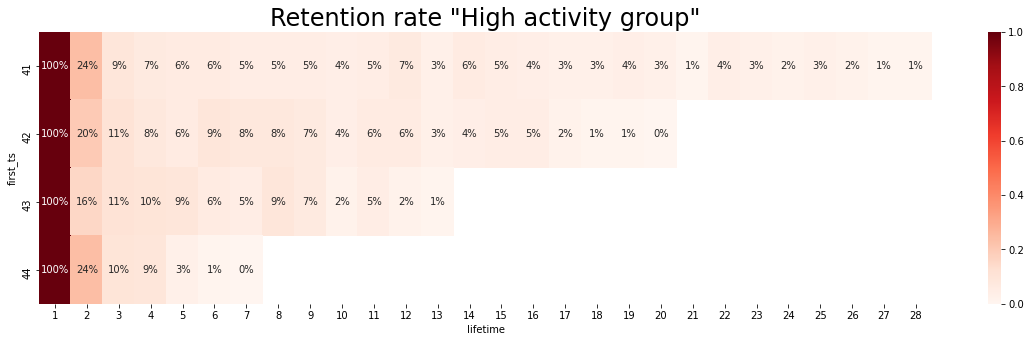

In [58]:
plt.figure(figsize=(20,5))
plt.title('Retention rate "High activity group"', fontsize=24)
ax = sns.heatmap(data=retention, annot=True, vmin=0.0, fmt = '.0%', cmap='Reds')
ax.set_yticklabels(cohort_counts.index)
fig=ax.get_figure()
plt.show()


In [59]:
data_compiled_low = data_compiled.query('status == "Низкая активность"')

In [60]:
group = data_compiled_low.groupby(['first_ts', 'lifetime'])
cohort_data = group['user_id'].size()
cohort_data = cohort_data.reset_index()
cohort_data

,first_ts,lifetime,user_id
0,41,1,5534
1,41,2,349
2,41,3,283
3,41,4,250
4,41,5,166
5,41,6,226
6,41,7,157
7,41,8,178
8,41,9,122
9,41,10,134


In [61]:

cohort_counts = cohort_data.pivot(index='first_ts', columns='lifetime', values='user_id')
base = cohort_counts[1]
retention = cohort_counts.divide(base, axis=0).round(3)

In [62]:
cohort_counts

lifetime,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
first_ts,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41,"5,534.00",349.00,283.00,250.00,166.00,226.00,157.00,178.00,122.00,134.00,111.00,102.00,87.00,147.00,120.00,92.00,132.00,85.00,66.00,110.00,61.00,57.00,105.00,45.00,20.00,37.00,12.00,6.00
42,"6,001.00",353.00,264.00,216.00,149.00,179.00,163.00,131.00,240.00,140.00,77.00,72.00,102.00,172.00,98.00,146.00,63.00,57.00,16.00,6.00,18.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,"5,721.00",393.00,225.00,211.00,178.00,169.00,124.00,245.00,88.00,92.00,41.00,26.00,24.00,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,"4,843.00",274.00,102.00,59.00,42.00,17.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
retention = cohort_counts.divide(base, axis=0).round(2)
retention

lifetime,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
first_ts,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41,1.00,0.06,0.05,0.05,0.03,0.04,0.03,0.03,0.02,0.02,0.02,0.02,0.02,0.03,0.02,0.02,0.02,0.02,0.01,0.02,0.01,0.01,0.02,0.01,0.00,0.01,0.00,0.00
42,1.00,0.06,0.04,0.04,0.02,0.03,0.03,0.02,0.04,0.02,0.01,0.01,0.02,0.03,0.02,0.02,0.01,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,1.00,0.07,0.04,0.04,0.03,0.03,0.02,0.04,0.02,0.02,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,1.00,0.06,0.02,0.01,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


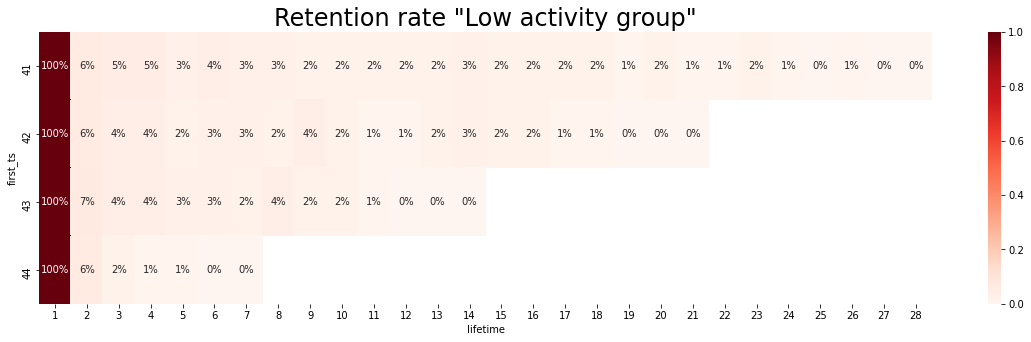

In [64]:
plt.figure(figsize=(20,5))
plt.title('Retention rate "Low activity group"', fontsize=24)
ax = sns.heatmap(data=retention, annot=True, vmin=0.0, fmt = '.0%', cmap='Reds')
ax.set_yticklabels(cohort_counts.index)
fig=ax.get_figure()
plt.show()

###  Промежуточные выводы

За время проведения анализа пользовательского поведения мы разбили наши данные на два сегмента - пользователи с “Высокой активностью”, пользователи с “Низкой активностью”.
После этого, мы выяснили, что:
- наиболее популярными событиями, которые совершают пользователи являются (tips_show, photos_show, advert_open, show_contacts, map, search_1)
- в целом, активность пользователей в нашем приложении растет.
- пользователи с высокой активностью открывают больше объявлений, но совершают меньше звонков по ним. Опять же, наиболее популярным способом поиска товаров является search_1, особенно среди пользователей с низкой активностью. Пользователи с "Высокой активностью" просматривают больше "рекомендованных объявлений", и за редким исключением, реагируют на них. Пользователи с низкой активностью также склонны игнорировать "рекомендации".
- в среднем, пользователи с Высокой активностью проводят около 19 минут в мобильном приложении за время одной сессии, в то время как пользователи с Низкой активностью проводят около 9 минут за время одной сессии.
- чаще всего пользователи видят "рекомендации", открывают объявления, просматривают фото, открывают контакты, и почему-то крайне редко звонят.
- конверсия пользователей с “Низкой активностью” в целевое действия на порядок выше
- пользователи с "Высокой активностью" тратят больше времени на просмотр объявлений, перед тем как кому-нибудь звонить с предложением о покупке товара.
- пользователи с “Высокой активностью” склонны чаще возвращаться в наше мобильное приложение

- Чаще всего пользователи с "Высокой активностью" видят "рекомендации", просматривают фото, открывают объявления, открывают контакты, а также просматривают объявления на карте.
- Пользователи с "Низкой активностью" чаще всего просматривают "рекомендованные объявления", просматривают фото, ищут товары с помощью search_1, просматривают объявления на карте, открывают объявления.
- Можно заметить, что пользователи с "Низкой активностью" чаще просматривают фото, но реже открывают объявления. Также, они чаще осуществляют поиск объявлений, но реже их просматривают. Предпологаю, что пользователи с "Высокой активностью" умеет точнее формулировать свои поисковые запросы и находить то, что им нужно.

# Шаг 4. Проверка гипотез 

### 4а. Гипотеза 1. Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.

**Нулевая гипотеза Н0:** Конверсия в просмотры контактов у пользователей, установивших приложение по ссылке из Яндекс и Гугл ОДИНАКОВАЯ;<br><br>
**Альтернативная гипотеза:** Конверсия в просмотры контактов у пользователей, установивших приложение по ссылке из Яндекс и Гугл РАЗНАЯ;

In [65]:
h1_data = data_compiled.query('source == "yandex" or source =="google"')
h1_data = h1_data.query('event_name == "show_contacts"')
h1_data = h1_data.groupby('source').agg({'user_id':'nunique','source':'count'})
h1_data['conversion_to_target_action'] = h1_data['user_id'] / h1_data['source']
h1_data

,user_id,source,conversion_to_target_action
source,,,
google,275,1440,0.19
yandex,478,2035,0.23


In [66]:
def z_test(successes1, successes2, trials1, trials2, alpha=0.05):
    p1 = successes1 / trials1
    p2 = successes2 / trials2

    p_combined = (successes1 + successes2) / (trials1 + trials2)
    difference = p1 - p2

    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2)) 
    distr = st.norm(0, 1)  
    p_value = (1 - distr.cdf(abs(z_value))) * 2 
    print('p-значение: ', p_value)

    if (p_value < alpha): 
        display('Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия')
    else:
        display('Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет')
        
z_test(275,478,1440,2035)

p-значение:  0.001964659362819754


'Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия'

### 4в. Гипотеза 2. Конверсия в целевое действие не менялась в начале (первая неделя) и в конце (последняя неделя) периода нашего исследования.

**Нулевая гипотеза Н0:** Конверсия в просмотры контактов у пользователей, пользующихся приложением не менялась в начале (первая неделя) и в конце (последняя неделя) периода нашего исследования - ОДИНАКОВАЯ;<br><br>
**Альтернативная гипотеза:** Конверсия в просмотры контактов у пользователей, пользующихся приложением различается в начале (первая неделя) и в конце (последняя неделя) периода нашего исследования - РАЗНАЯ;

In [67]:
h2_data = data_compiled.query('week_number == 41 or week_number == 44')
h2_data = h2_data.query('event_name == "show_contacts"')
h2_data = h2_data.groupby('week_number').agg({'user_id':'nunique','week_number':'count'})
h2_data['conversion_to_target_action'] = h2_data['user_id'] / h2_data['week_number']
h2_data

,user_id,week_number,conversion_to_target_action
week_number,,,
41,218,634,0.34
44,298,1261,0.24


In [68]:
z_test(218,298,634,1261)

p-значение:  6.991312566650976e-07


'Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия'

###  Промежуточные выводы

Нами были сформулированы две гипотезы:
- Гипотеза 1. Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.
- Гипотеза 2. Конверсия в целевое действие не менялась в начале (первая неделя) и в конце (последняя неделя) периода нашего исследования.

После проверки данных гипотез мы выяснили, что:
- Конверсия в просмотры контактов у пользователей, установивших приложение по ссылке из Яндекс и Гугл РАЗНАЯ;
- Конверсия в просмотры контактов у пользователей, пользующихся приложением различается в начале (первая неделя) и в конце (последняя неделя) периода нашего исследования - РАЗНАЯ;

# Шаг 5. Общие выводы по проекту

### - сформулировать общие выводы по проекту, интерепретировать полученные результаты, предоставить результаты проверки двух гипотез, сформировать рекомендации на основе полученных данных. 

Во время подготовки данных были импортированы все необходимые библиотеки. После этого мы подгрузили документы 'mobile_soures.csv’, 'mobile_dataset.csv', с которым первично ознакомились. В данных таблицах мы нашли данные о поисковых платформах, с которых пользователи переходили в мобильное приложение и устанавливали его. Также, во второй таблице были данные о времени совершения различных событий (После объединения "событий-дубликатов" осталось 15 различных событий: ‘advert_open', 'contacts_call', 'favorites_add', 'map', 'photos_show', 'search_1', 'search_2', 'search_3', 'search_4', 'search_5', 'search_6', 'search_7', 'show_contacts', 'tips_click', 'tips_show’) каждым из пользователей. После этого мы выяснили, что пропущенные значения в таблице отсутствуют, также как и дубликаты. Столбцы в таблице были приведены к единому стилю. Типы данных в столбцах были изменены для удобства дальнейшей работы. После этого, мы объединили данные из двух таблиц в одну по “user_id”.
Данные были подготовлены для дальнейшей работы.

За время проведения анализа пользовательского поведения мы разбили наши данные на два сегмента - пользователи с “Высокой активностью”, пользователи с “Низкой активностью”.
После этого, мы выяснили, что:

- наиболее популярными событиями, которые совершают пользователи являются (tips_show, photos_show, advert_open, show_contacts, map, search_1)
- в целом, активность пользователей в нашем приложении растет.
- пользователи с высокой активностью открывают больше объявлений, но совершают меньше звонков по ним. Опять же, наиболее популярным способом поиска товаров является search_1, особенно среди пользователей с низкой активностью. Пользователи с "Высокой активностью" просматривают больше "рекомендованных объявлений", и за редким исключением, реагируют на них. Пользователи с низкой активностью также склонны игнорировать "рекомендации".
- в среднем, пользователи с Высокой активностью проводят около 19 минут в мобильном приложении за время одной сессии, в то время как пользователи с Низкой активностью проводят около 9 минут за время одной сессии.
- чаще всего пользователи видят "рекомендации", открывают объявления, просматривают фото, открывают контакты, и почему-то крайне редко звонят.
- конверсия пользователей с “Низкой активностью” в целевое действия на порядок выше
- пользователи с "Высокой активностью" тратят больше времени на просмотр объявлений, перед тем как кому-нибудь звонить с предложением о покупке товара.
- пользователи с “Высокой активностью” склонны чаще возвращаться в наше мобильное приложение
- Чаще всего пользователи с "Высокой активностью" видят "рекомендации", просматривают фото, открывают объявления, открывают контакты, а также просматривают объявления на карте.
- Пользователи с "Низкой активностью" чаще всего просматривают "рекомендованные объявления", просматривают фото, ищут товары с помощью search_1, просматривают объявления на карте, открывают объявления.
- Можно заметить, что пользователи с "Низкой активностью" чаще просматривают фото, но реже открывают объявления. Также, они чаще осуществляют поиск объявлений, но реже их просматривают. Предпологаю, что пользователи с "Высокой активностью" умеет точнее формулировать свои поисковые запросы и находить то, что им нужно.



Нами были сформулированы две гипотезы:
- Гипотеза 1. Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.
- Гипотеза 2. Конверсия в целевое действие не менялась в начале (первая неделя) и в конце (последняя неделя) периода нашего исследования.

После проверки данных гипотез мы выяснили, что:
- Конверсия в просмотры контактов у пользователей, установивших приложение по ссылке из Яндекс и Гугл РАЗНАЯ;
- Конверсия в просмотры контактов у пользователей, пользующихся приложением различается в начале (первая неделя) и в конце (последняя неделя) периода нашего исследования - РАЗНАЯ;

Рекомендации по развитию мобильного приложения:
1. Необходимо проработать и улучшить алгоритмы, которые выбирают какие именно объявления рекомендовать пользователям. В ходе нашего исследования мы убедились, что подавляющее большинство пользователей игнорируют “рекомендованные объявления” и крайне редко с ними взаимодействуют. (tips_click является наименее популярным действием среди пользователей в обоих группах пользователей, с высокой и низкой активностью. Лишь в 1% случаев пользователей совершают данное событие).
2. Необходимо повысить retention rate среди пользователей. Думаю, что будет полезно напоминать им о товарах, которые они добавили в “Избранное”, о новых товарах, которые появились в тех категориях, где пользователь пытался что-то найти до этого, да и в целом, совершать регулярную email-рассылку, чтобы название нашей мобильной платформы крутилось у пользователей в голове.
3. Также, необходимо привлекать трафик новых пользователей в наше приложение. На примере “Авито”, можно отметить, что они постоянно вкладывают деньги в рекламу. Не думаю, что люди постоянно продают “Ненужные вещи”, да и кому постоянно будет охота этим заниматься. Допустим, несколько продаж в год. Но, однажды продав товар на нашей платформе, у пользователя резко вырастает лояльность именно к нашему мобильному приложению. Так что, необходимо вкладывать деньги в рекламу. 